In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Read file
icfes = pd.read_csv("./data/icfes_preprocessing.csv", low_memory=False, encoding="utf-8")

print(icfes.shape)

(554679, 67)


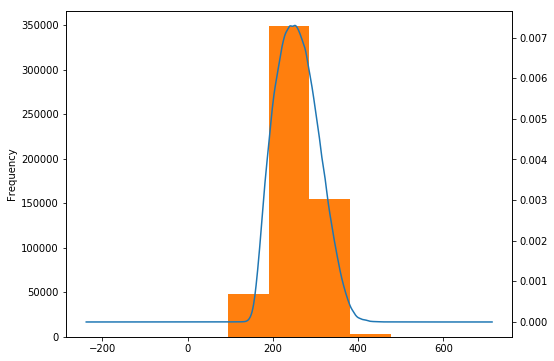

In [4]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
column = icfes['PUNT_GLOBAL']

column.plot.density(ax=ax1, secondary_y=True)

column.plot.hist(bins=5, ax=ax1)

plt.show()

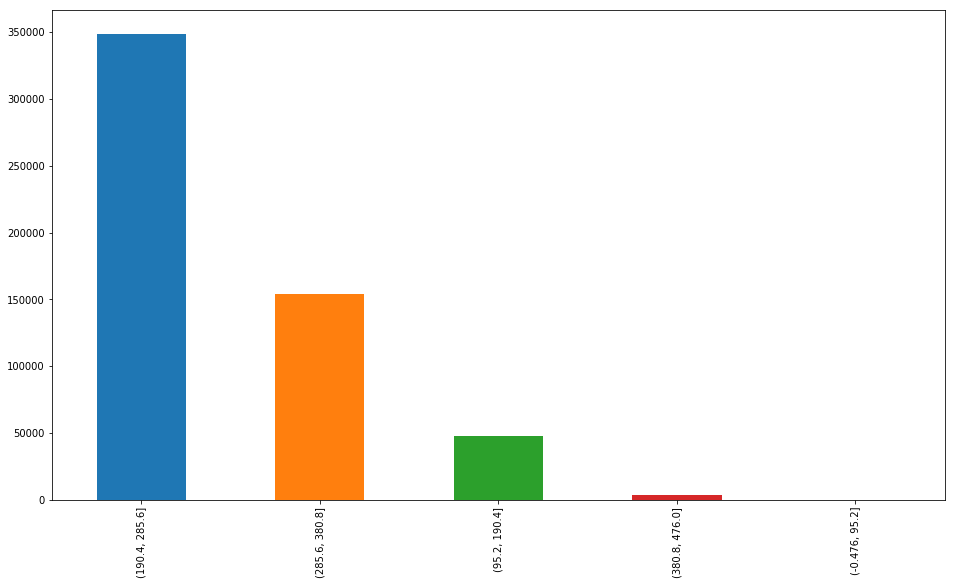

In [11]:
pg = pd.cut(icfes['PUNT_GLOBAL'], bins=5)

plt.figure(figsize=(16, 9))
pg.value_counts(dropna=False).plot.bar()

# Preprocessing

In [89]:
import math
from sklearn import preprocessing

m = math.ceil(icfes.shape[0]*0.01)

data = icfes.iloc[0: m, :]

n = data.shape[1]

X = data.drop(columns='PUNT_GLOBAL')
y = data['PUNT_GLOBAL']

print(data.shape)
print(X.shape)
print(y.shape)

# Remove unused columns
X = X.drop(columns=['PERCENTIL_C_NATURALES',
                    'PERCENTIL_GLOBAL',
                    'PERCENTIL_INGLES',
                    'PERCENTIL_LECTURA_CRITICA',
                    'PERCENTIL_MATEMATICAS',
                    'PERCENTIL_SOCIALES_CIUDADANAS'])
X = X[X.columns[X.columns.to_series().str.contains('FAMI')]]

# One-hot enconding
X = pd.get_dummies(X)

# Discretization
y = pd.cut(y, bins=5).astype(str)
y_labels = y

# Enconding

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y)

y.describe(include='all')

y.info()

y_labels.unique().astype(str)

(5547, 67)
(5547, 66)
(5547,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5547 entries, 0 to 5546
Data columns (total 1 columns):
0    5547 non-null int64
dtypes: int64(1)
memory usage: 43.4 KB


array(['(145.69, 208.0]', '(270.0, 332.0]', '(332.0, 394.0]',
       '(208.0, 270.0]', '(394.0, 456.0]'], dtype='<U15')

In [90]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X.values, y.values)

print(clf.predict(X.iloc[0:2].values))

print(y.values[0:2].transpose())

[0 2]
[[0 2]]


In [102]:
import graphviz
import pydot

# Plot tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                 class_names=le.classes_,
                               filled=True, proportion=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph.save("tree.dot")

(g,) = pydot.graph_from_dot_file('tree.dot')
g.write_svg('tree.svg')